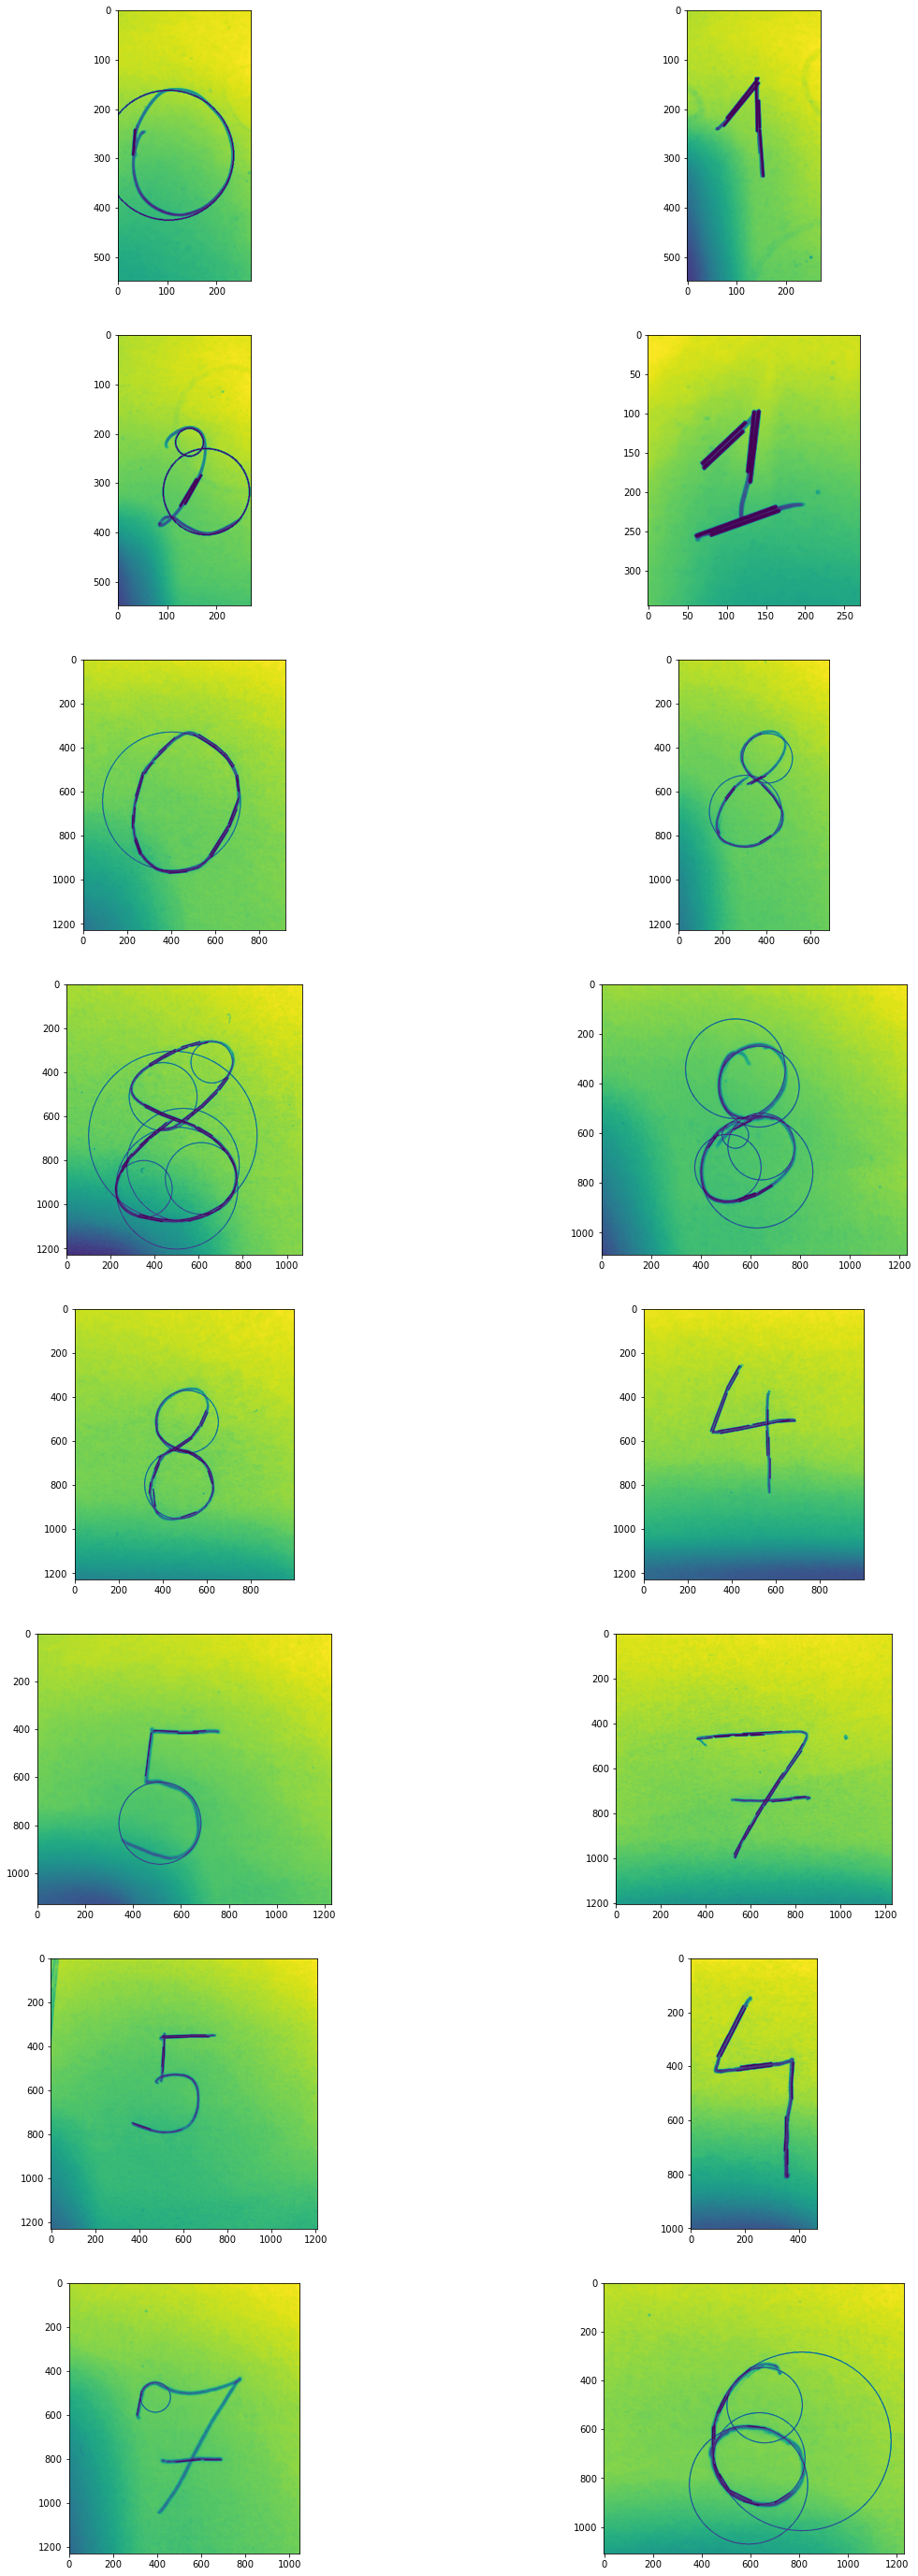

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import morphology, feature

n=16
plt_m=2
plt_n=int(n/plt_m)
fsize=(20,50)

scale_percent = 60

sq1=5
sq2=2

pictures=[]
for i in range(n):
    tmp=str(i)
    if(i<10):
        tmp='0'+tmp
    pictures.append(tmp)

def main():
    
    global plt_m,plt_n,n
    plt.figure(figsize=fsize)
    sub=1
    
    for table in pictures:
        plt.subplot(plt_n,plt_m,sub)
        image=cv2.imread('data/calc_'+table+'.jpg')

        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)
        dim = (width, height)
        image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
        

        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        #img=cv2.Canny(img,100,200)
        
        
        img = morphology.erosion(img, morphology.square(sq1))
        img = morphology.dilation(img, morphology.square(sq2))
        dst = cv2.Canny(img, 50, 200, None, 3)

        circles = cv2.HoughCircles(
            img,
            cv2.HOUGH_GRADIENT,
            1,
            100,
            param1=50,
            param2=40,
            minRadius=0,
            maxRadius=0
        )
        if (circles is not None):
            circles = np.uint16(np.around(circles))
            for i in circles[0,:]:
                # draw the outer circle
                cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
                # draw the center of the circle
                #cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)
        
        linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
        if linesP is not None:
            for i in range(0, len(linesP)):
                l = linesP[i][0]
                cv2.line(img, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

        plt.imshow(img)
        sub+=1
    plt.show()

    
if __name__=='__main__':
    main()